<a href="https://colab.research.google.com/github/ipshita1503/CITREA-INDIA-TOUR/blob/main/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df= pd.read_csv("marketing_AB.csv")

In [ ]:
df.head(10)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20.0
1,1,1119715,ad,False,93,Tuesday,22.0
2,2,1144181,ad,False,21,Tuesday,18.0
3,3,1435133,ad,False,355,Tuesday,10.0
4,4,1015700,ad,False,276,Friday,14.0
5,5,1137664,ad,False,734,Saturday,10.0
6,6,1116205,ad,False,264,Wednesday,13.0
7,7,1496843,ad,False,17,Sunday,18.0
8,8,1448851,ad,False,21,Tuesday,19.0
9,9,1446284,ad,False,142,Monday,14.0


In [ ]:
df.duplicated(subset = 'user id').sum()

np.int64(0)

In [ ]:
df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True )

In [ ]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [ ]:
df_cat = df[['test group', 'converted' ,'most ads day' , 'most ads hour']]
df_cat.nunique()

,0
test group,2
converted,2
most ads day,7
most ads hour,24


Univariate Analysis

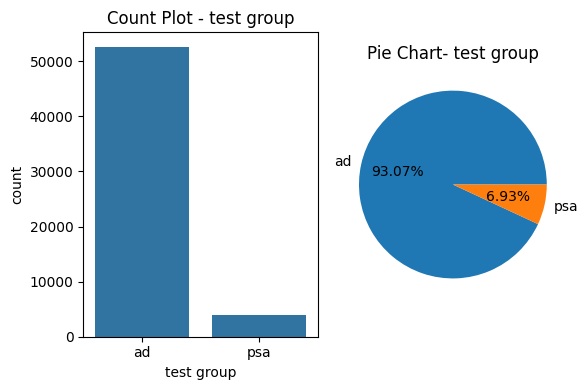

In [ ]:
variable= 'test group'

plt.figure(figsize=(6,4))
#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2,2)
counts =df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index, autopct = '%0.2f%%')
plt.title(f'Pie Chart- {variable}')

#Adjust layout
plt.tight_layout()

# Showing the plots
plt.show()

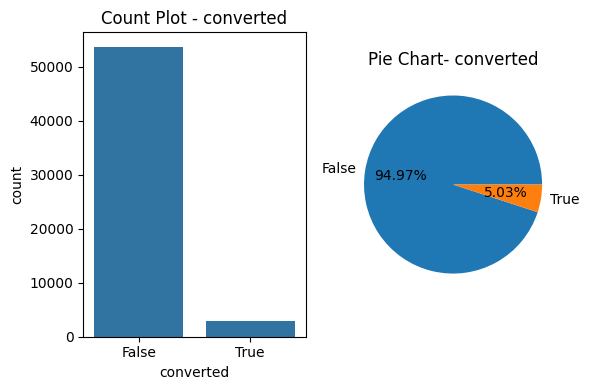

In [ ]:
variable= 'converted'

plt.figure(figsize=(6,4))
#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2,2)
counts =df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index, autopct = '%0.2f%%')
plt.title(f'Pie Chart- {variable}')

#Adjust layout
plt.tight_layout()

# Showing the plots
plt.show()

ValueError: unsupported format character '%' (0x25) at index 4

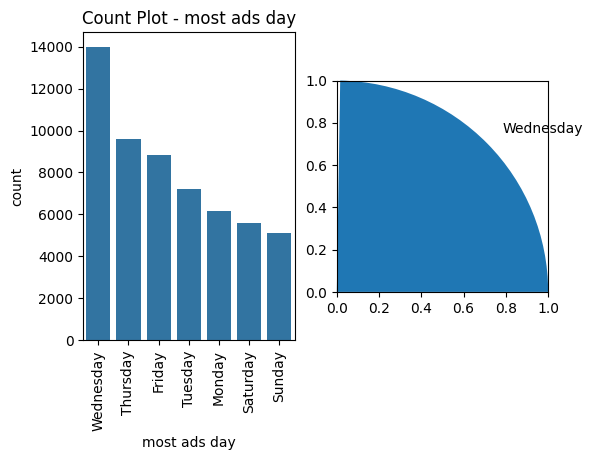

In [ ]:
variable= 'most ads day'

plt.figure(figsize =(6,4))
#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable , data=df_cat, order =df_cat['most ads day'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

#pie chart
plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2%%')
plt.title(f'Pie Chart- {variable}')

#Adjust Layout
plt.tight_layout()

plt.show()

In [ ]:
variable= 'most ads hour'

plt.figure(figsize =(8,4))
#Count Plot
plt.subplot(1,2,1)
sns.countplot (x=variable, data=df_cat, order=df_cat['most ads hour'].value_counts().index)
plt.title(f'Count Plot- {variable}')
plt.xticks(rotation = 90)

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable}')

#Adjust Layout
plt.tight_layout()
plt.show()

In [ ]:
variable = 'total ads'

plt.figure(figsize=(6,4))
#histogram
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df)
plt.title(f'Histogram- {variable}')

#Pie Chart
plt.subplot(1,2,2)
sns.boxplot(y= variable, data = df)
plt.title(f'Boxplot - {variable}')

plt.tight_layout()
plt.show()

In [ ]:
# descriptive stats
df['total ads'].describe()

In [ ]:
variable= 'total ads'

plt.figure(figsize= (6,4))

plt.subplot(1,2,1)
#Filtering data for a value close to 75th percentile only for better visualization
sns.histplot(x=variable, data=df[df['total ads'] < 50])
plt.title (f'Histogram - {variable}')
#pie chart
plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df[df['total ads'] < 50])
plt.title(f'Boxplot- {variable}')

plt.tight_layout()
plt.show()

Bivariate Analysis

In [ ]:
df.columns

In [ ]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize ='index')
ct_conversion_test_group

In [ ]:
ct_conversion_test_group.plot.bar(stacked = True)

In [ ]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize= 'index')
print(ct_conversion_day.sort_values(by= True, ascending = False))
ct_conversion_day.plot.bar(stacked= True)

In [ ]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize= 'index')
print(ct_conversion_hour.sort_values(by= True, ascending = False))
ct_conversion_hour.plot.bar(stacked= True)

In [ ]:
sns.boxplot(x='converted' , y ='total ads', data = df)

In [ ]:
sns.boxplot(x='converted' , y ='total ads', data = df[df['total ads']< 50])

Satistical Tests

In [ ]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
    if variable !='converted':
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"\nChi-squared test for {variable} vs converted:")
        print(f"Chi-squared value :{chi2}")
        print(f"p-value: {p}")

        if p < alpha:
              print(f"The difference in conversion rates across {variable} is statistically significant.")
        else:
              print(f"There is no significant difference in conversion rates across {variable}.")


Chi-squared test for test group vs converted:
Chi-squared value :36.38670034877202
p-value: 1.6180355312542065e-09
The difference in conversion rates across test group is statistically significant.

Chi-squared test for most ads day vs converted:
Chi-squared value :360.6956214230658
p-value: 7.797382310032894e-75
The difference in conversion rates across most ads day is statistically significant.

Chi-squared test for most ads hour vs converted:
Chi-squared value :134.64931539439468
p-value: 8.99203066099667e-18
The difference in conversion rates across most ads hour is statistically significant.


In [ ]:
df_cat.columns

Index(['test group', 'converted', 'most ads day', 'most ads hour'], dtype='object')

In [ ]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])
print(f"Shapiro-wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-wilk test for normality (False group): p-value = {shapiro_p_value_false}")

levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']] ['total ads'])
print(f"Levene's test for equality of variances:p-value={levene_p_value}")
alpha = 0.05
if shapiro_p_value_true>alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
  t_stat , t_p_value =ttest_ind(df[df['converted']]['total ads'], df[~df['converted']] ['total ads'])
  print(f"Independent two-sample t-test: p-value={t_p_value}")
else:
  u_stat,u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']] ['total ads'])
  print(f"Mann-Whitney U test : p-value={u_p_value}")

Shapiro-wilk test for normality (True group): p-value = 7.861975725821984e-58
Shapiro-wilk test for normality (False group): p-value = 4.5820169297094824e-135
Levene's test for equality of variances:p-value=9.843279957615169e-90
Mann-Whitney U test : p-value=0.0


In [ ]:
alpha = 0.05
if shapiro_p_value_true>alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
  t_stat , t_p_value =ttest_ind(df[df['converted']]['total ads'], df[~df['converted']] ['total ads'])
  print(f"Independent two-sample t-test: p-value={t_p_value}")
else:
  u_stat,u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']] ['total ads'])
  print(f"Mann-Whitney U test : p-value={u_p_value}")

Mann-Whitney U test : p-value=0.0
